# Отчет по лабораторной №4
## по курсу "Системы аналитических вычислений"

### группа: М8О-207Б-19
### студент: Бирюков В. В.

## Исследование функции

### Варианты:

In [1]:
tasks = {
    Sin[2*x^3]^2/x^3
    , (x^2 - 4)*Sin[(Pi*(x^2))/6] / (x^2 - 1)
    , Sqrt[Abs[3*x^3 + 2*x^2 - 10*x]] / (4*x)
    , 1/2 * Log[Sqrt[x^2 + 1] / Sqrt[x^2 - 1]] - 15*x^2
    , (x^3 - x^2 - x + 1)^(1/3) / Tan[x]
    , 2*Log[(x - 1) / x] + 1
    , Log[x - 1] / (x - 1)^2
};

In [2]:
getVariantForNumber[number_, variationsQuo_] := (
    Module[{t},
        t = Mod[number , variationsQuo];
        If[t != 0
                , t
                , variationsQuo
            ]
    ]
)

Number of you variant: 1


FormBox[FractionBox[RowBox[{SuperscriptBox["sin", "2"], "(", 

 
>         RowBox[{"2", " ", SuperscriptBox["x", "3"]}], ")"}], SuperscriptBox["x",\
 
>    "3"]], 
   TraditionalForm]
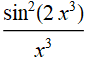

In [3]:
yourNumber = 1;
numberOfYourTask = getVariantForNumber[yourNumber, Length[tasks]];
Print["Number of you variant: ", numberOfYourTask]

(* Делаем из выражения функцию *)
f = Function[tasks[[numberOfYourTask]] /. x -> #];
f[x]//TraditionalForm

### 1. Область определения функции.

In [9]:
(* Знаменатель  *)
g = x^3;
notDomain = x /. (Solve[g == 0, x] // DeleteDuplicates)

{0}

-Graphics-
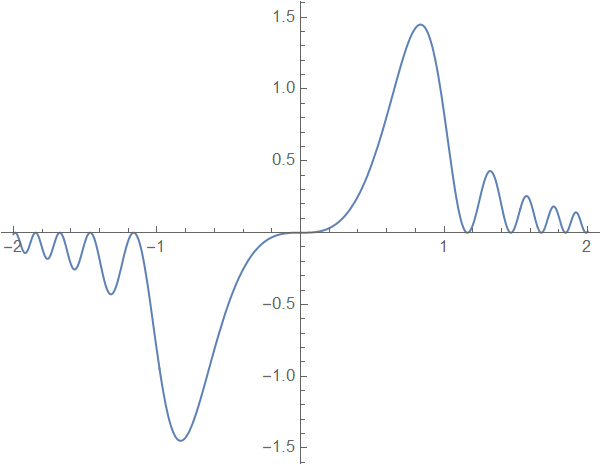

In [12]:
Plot[f[x], {x, -2, 2}, Exclusions -> notDomain, AspectRatio -> Automatic]

### 2. Является ли функция четной или нечетной, является ли периодической.

In [13]:
res1 = f[x] == f[-x] //TautologyQ;
res2 = f[x] == -f[-x] //TautologyQ;

If[res1 == True,"Функция четная", Null]
If[res2,"Функция нечетная", Null]
If[Not[res1||res2], "Функция прочая", Null]

Функция нечетная

This system cannot be solved with the methods available to Solve.: This system cannot be solved with the methods available to Solve.

3 2                 3 2
        Sin[2 x ]     Sin[2 (T + x) ]
Solve[-(----------) + ---------------- == 0, T]
             3                   3
            x             (T + x)
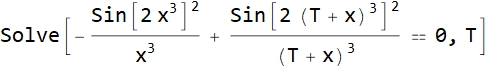

In [18]:
Solve[f[x + T] - f[x] == 0, T]

Решений нет. Функция не периодическая.

### 3. Точки пересечения графика с осями координат.

Пересечения с осью $Ox$.

-Graphics-
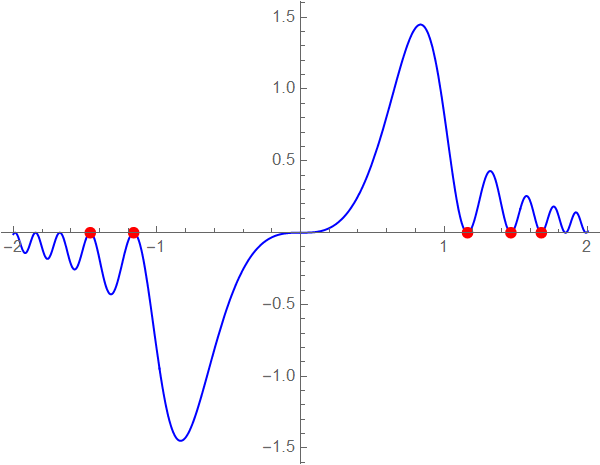

In [19]:
sols = Solve[f[x] == 0, Reals];
rootsZero = x /. sols;
rootsZero = Join[rootsZero /. C[1] -> -1, rootsZero /. C[1] -> 0, rootsZero /. C[1] -> 1] // DeleteCases[0];

g1 = Plot[f[x], {x, -2, 2}, PlotStyle -> Blue, AspectRatio -> Automatic, Exclusions -> notDomain];
g2 = ListPlot[Map[{#, 0}&, rootsZero], PlotStyle -> {Red, PointSize[Large]}];
Show[{g1, g2}]

Пересечений с осью $Oy$ нет, так как $x = 0$ не входит в область определения.

### 4. Промежутки знакопостоянства.

In [25]:
(* Функция округления *)
DecimalRound = ResourceFunction["DecimalRound"];

-Graphics-
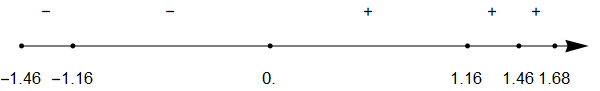

In [27]:
roots = Map[N, Join[rootsZero, notDomain]] // Sort;
margin = 0.2;

plots = {Graphics[Arrow[{{roots[[1]], 0}, {roots[[-1]]+0.2, 0}}]]};
For [i = 1, i <= Length[roots], i++,
    plots = Append[plots, Graphics[Point[{roots[[i]], 0}]]];
    plots = Append[plots, Graphics[Text[ToString[DecimalRound[roots[[i]], 3]], {roots[[i]], -margin}]]]
]

For [i = 1, i < Length[roots], i++,
    x0 = (roots[[i]] + roots[[i+1]]) / 2;
    plots = Append[plots, Graphics[Text[If[f[x0] >= 0, "+", "-"], {x0, margin}]]]
]

Show[plots]

### 5. Промежутки возрастания и убывания.

Первая производная функции и ее график.

3        3           3          3
3 (4 x  Cos[2 x ] - Sin[2 x ]) Sin[2 x ]
----------------------------------------
                    4
                   x
-Graphics-
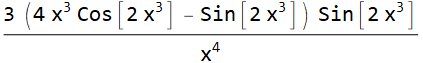
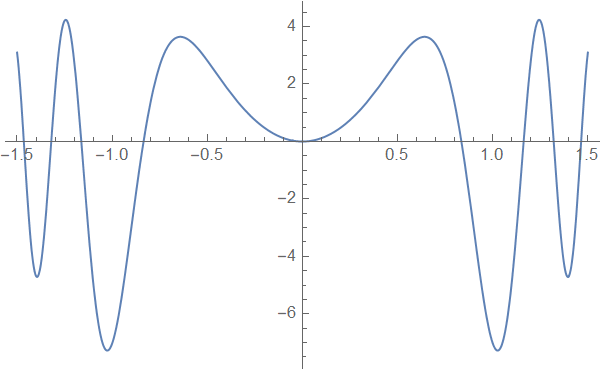

In [33]:
df = D[f[x], x];
df = Simplify[df]
Plot[df, {x, -1.5, 1.5}, Exclusions -> notDomain]

In [36]:
Solve[df == 0, x];

This system cannot be solved with the methods available to Solve.: This system cannot be solved with the methods available to Solve.

Нельзя решить аналитически. Ищем корни численно.

In [37]:
sols = Table[FindRoot[df, {x, x0}], {x0, -1.2, 1.2, 0.4}];
(* Дополнительно фильтруем от близких к нулю "корней" *)
rootsExtreme = x /. sols // Select[(Abs[#] > 0.1)&]

{-1.16245, -0.835286, 0.835286, 1.16245}

-Graphics-
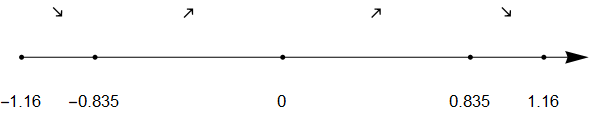

In [40]:
roots = Join[rootsExtreme, notDomain] // Sort;
margin = 0.2;

plots = {Graphics[Arrow[{{roots[[1]], 0}, {roots[[-1]]+0.2, 0}}]]};
For [i = 1, i <= Length[roots], i++,
    plots = Append[plots, Graphics[Point[{roots[[i]], 0}]]];
    plots = Append[plots, Graphics[Text[ToString[DecimalRound[roots[[i]], 3]], {roots[[i]], -margin}]]]
]

For [i = 1, i < Length[roots], i++,
    x0 = (roots[[i]] + roots[[i+1]]) / 2;
    plots = Append[plots, Graphics[Rotate[Text["→", {x0, margin}], If[N[df/.x->x0] >= 0, 1, -1] * 45 Degree]]]
]

Show[plots]

### 6. Точки экстремума и значения в этих точках

Вторая производная функции и ее график.

6         3        3        3
6 + (-6 + 72 x ) Cos[4 x ] - 24 x  Sin[4 x ]
--------------------------------------------
                      5
                     x
-Graphics-
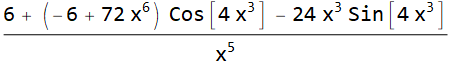
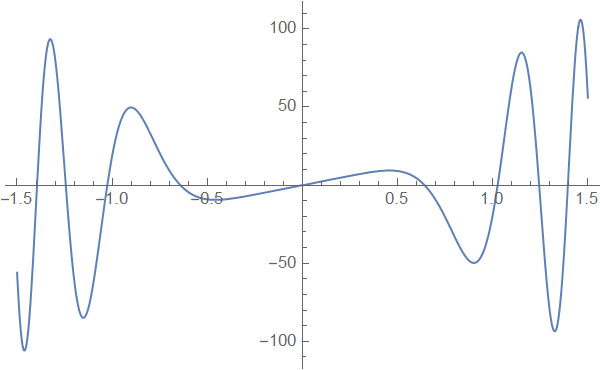

In [46]:
ddf = D[f[x], {x, 2}];
ddf = Simplify[ddf]
Plot[ddf, {x, -1.5, 1.5}, Exclusions -> notDomain]

In [49]:
For [i = 1, i <= Length[rootsExtreme], i++,
    Print["x = ", ToString[DecimalRound[rootsExtreme[[i]], 3]],
          ", f(x) = ", ToString[DecimalForm[f[rootsExtreme[[i]]], 3]], 
          " - local ", 
          If[N[ddf/.x->rootsExtreme[[i]]] > 0, "minimum", "maximum"]]
]

x = -1.16, f(x) = -0.0000000000000000000000000000000659 - local maximum
x = -0.835, f(x) = -1.45 - local minimum
x = 0.835, f(x) = 1.45 - local maximum
x = 1.16, f(x) = 0.0000000000000000000000000000000659 - local minimum


### 7. Непрерывность. Наличие точек разрыва и их классификация.

In [50]:
For [i = 1, i <= Length[notDomain], i++,
    limLeft = Limit[f[x], x -> notDomain[[i]], Direction -> "FromBelow"];
    limRight = Limit[f[x], x -> notDomain[[i]], Direction -> "FromAbove"];
    Print["x = ", ToString[DecimalRound[notDomain[[i]], 3]],
          " - discontinuity of the ",
          If [limLeft == limRight && Abs[limLeft] != Infinity, "first", "second"],
          " kind"]
]

x = 0 - discontinuity of the first kind


### 8. Асимптоты.

In [51]:
limInfLeft = Limit[f[x], x -> -Infinity]
limInfRight = Limit[f[x], x -> Infinity]

0
0

В точке разрыва асимптоты не существует.

-Graphics-
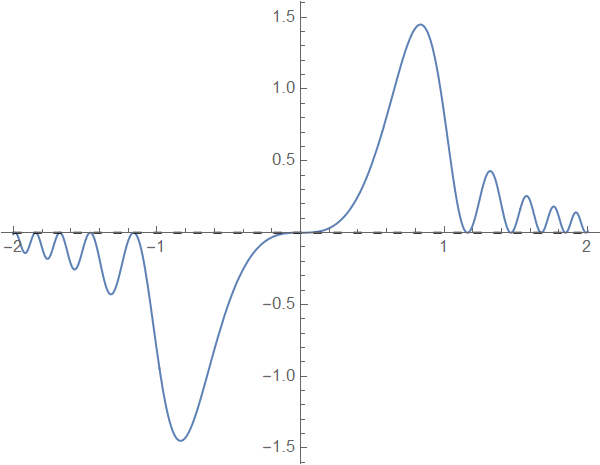

In [53]:
Show[
    Plot[f[x], {x, -2, 2}, Exclusions -> notDomain, AspectRatio -> Automatic],
    Graphics[{Thickness[0.005], Dashing[Medium], Line[{{-2, 0}, {2, 0}}]}]
]